# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames, Gadfly

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [3]:
DataF = Matrix(data)'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [4]:
k = 15
result = kmeans(DataF, k)

KmeansResult{Array{Float64,2},Float64,Int64}([852058.4525993884 168521.44082840238 … 244654.88563049852 413909.4088888889; 157685.52293577982 345622.46153846156 … 847642.0410557184 412779.5466666667], [11, 11, 11, 11, 11, 11, 11, 11, 11, 11  …  6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  2.818333299736328e8, 5.894317032715332e9, 2.948263640739258e9, 2.094690922705078e7, 5.5591316869765625e9, 1.75454214078125e8, 2.2580043328320312e8, 7.600214612407227e8, 6.145172446421875e9, 2.748227945390625e8], [327, 338, 313, 336, 314, 375, 636, 325, 684, 294, 297, 128, 67, 341, 225], [327, 338, 313, 336, 314, 375, 636, 325, 684, 294, 297, 128, 67, 341, 225], 2.0130766374707703e13, 40, true)

In [5]:
data[!, :cluster] = string.(assignments(result));

In [6]:
result.centers

2×15 Array{Float64,2}:
 852058.0  168521.0  132349.0  617870.0  …  244788.0  244655.0  413909.0
 157686.0  345622.0  558387.0  398983.0     548649.0  847642.0  412780.0

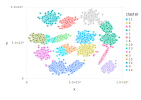

In [7]:
plot(data, x="x", y="y", color="cluster", Geom.point)